In [2]:
import matplotlib.pyplot as plt
from bilateral import *
from shadow_removal import *

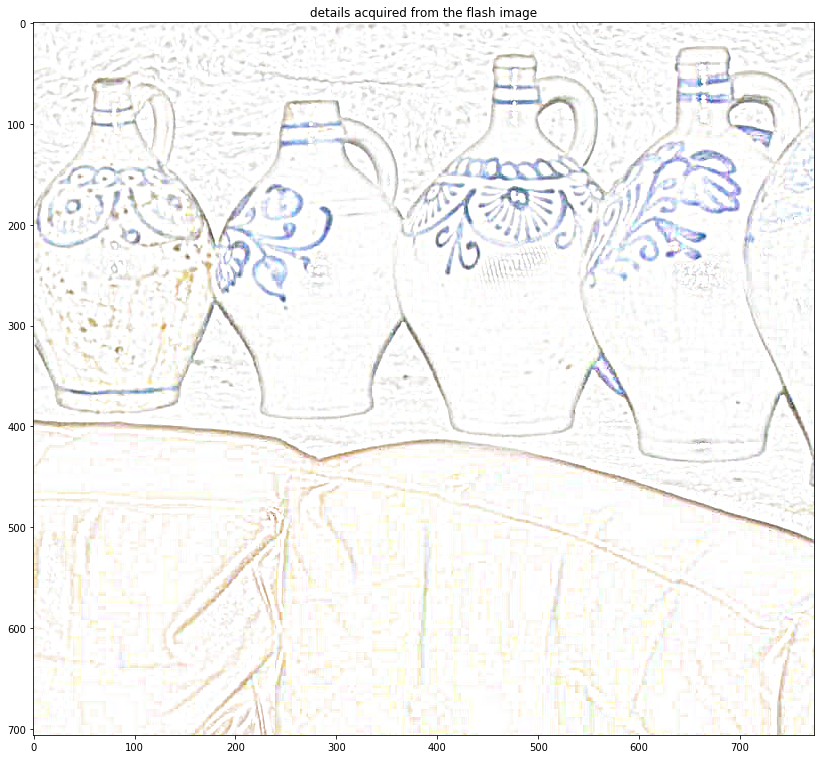

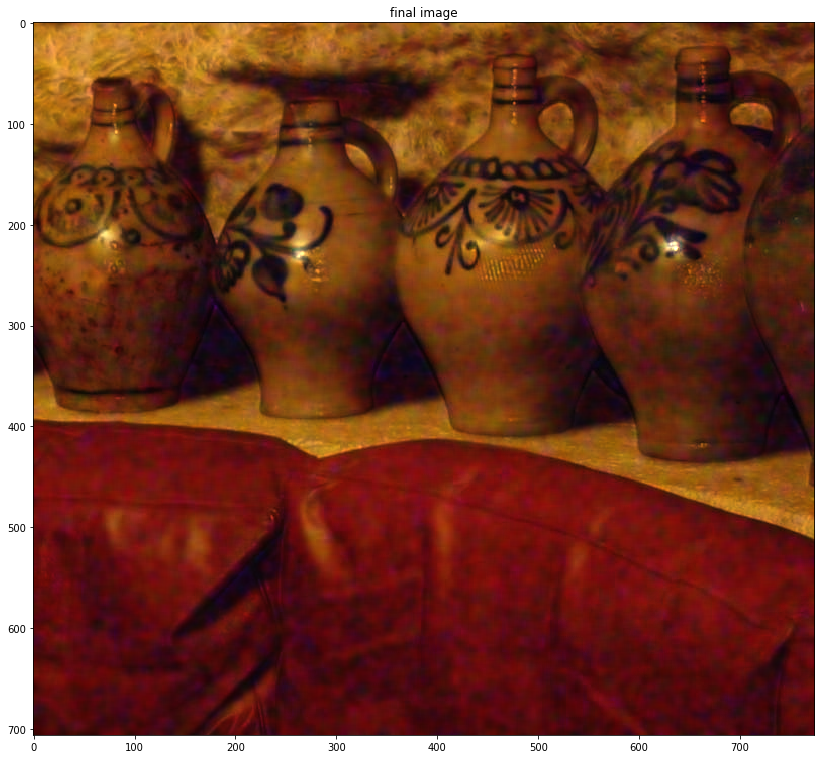

In [3]:
flash_img = cv2.imread('./dataset/cave01_00_flash.jpg')
amb_img = cv2.imread('./dataset/cave01_01_noflash.jpg')

flash_img = cv2.cvtColor(flash_img, cv2.COLOR_BGR2RGB)
amb_img = cv2.cvtColor(amb_img, cv2.COLOR_BGR2RGB)

flash_img = flash_img.astype('double')/255
amb_img = amb_img.astype('double')/255

fr = flash_img[:,:,0]
fg = flash_img[:,:,1]
fb = flash_img[:,:,2]

[Ajointr, Abaser, Fbaser] = bilateral(fr, amb_img[:,:,0])
[Ajointg, Abaseg, Fbaseg] = bilateral(fg, amb_img[:,:,1])
[Ajointb, Abaseb, Fbaseb] = bilateral(fb, amb_img[:,:,2])

Ajoint = np.dstack((Ajointr, Ajointg, Ajointb))
Abase = np.dstack((Abaser, Abaseg, Abaseb))
Fbase = np.dstack((Fbaser, Fbaseg, Fbaseb))

eps = 0.02;
Fdetailr = (fr + eps)/(Fbaser + eps)
Fdetailg = (fg + eps)/(Fbaseg + eps)
Fdetailb = (fb + eps)/(Fbaseb + eps)
Fdetail = np.dstack((Fdetailr, Fdetailg, Fdetailb))

shadowMask = shadowRem(flash_img, amb_img)
shadowMask_fin = np.zeros((shadowMask.shape[0]-2, shadowMask.shape[1]-2))
shadownMask_fin = shadowMask[:-2,:-2]
Ffin = (np.dstack(((1-shadowMask_fin), (1-shadowMask_fin), (1-shadowMask_fin)))*(Ajoint*Fdetail) + np.dstack((shadowMask_fin, shadowMask_fin, shadowMask_fin))*(Abase))

# Ffin = (np.dstack(((1-shadowMask), (1-shadowMask), (1-shadowMask)))*(Ajoint*Fdetail) + np.dstack((shadowMask, shadowMask, shadowMask))*(Abase))
Ffin[Ffin>1] = 1
Fdetail[Fdetail>1] = 1
plt.figure(figsize=[14, 14])
plt.imshow(Fdetail, cmap='gray')
plt.title('details acquired from the flash image')
plt.figure(figsize=[14, 14])
plt.title('final image')
plt.imshow(Ffin)
